# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
%matplotlib inline


**Step 2:** Load the dataset _(done for you)_.

In [5]:
# refer ml1 for more information
def load_iris():
    return datasets.load_iris()

In [6]:
iris_data = load_iris()
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
# Create pd DF the same way you did the first day
# Create the class and target columns and remove de cm from the columns names
# refer ml1 for more information

def create_df():
  df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) 
  df.columns = [i.strip(" (cm)") for i in df.columns.tolist()]

  # iris_data['target'] or iris_data.target are same
  df['target'] = iris_data.target
  df['class'] = iris_data.target_names[iris_data.target]
  return df

create_df()

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
118,7.7,2.6,6.9,2.3,2,virginica
128,6.4,2.8,5.6,2.1,2,virginica
145,6.7,3.0,5.2,2.3,2,virginica
6,4.6,3.4,1.4,0.3,0,setosa
93,5.0,2.3,3.3,1.0,1,versicolor
20,5.4,3.4,1.7,0.2,0,setosa
60,5.0,2.0,3.5,1.0,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
69,5.6,2.5,3.9,1.1,1,versicolor
68,6.2,2.2,4.5,1.5,1,versicolor


In [13]:
df_iris = create_df()
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [80]:

#From our data we will only get variable columns as np.array
x = np.array(df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']])
x[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [81]:
assert x.shape == (150, 4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [44]:
from sklearn.preprocessing import normalize
samples = normalize(x)
samples[:3]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949]])

In [45]:
mergings = linkage(samples, method = 'complete')
mergings[:3]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.02000000e+02, 1.11000000e+02, 1.90111713e-03, 2.00000000e+00],
       [0.00000000e+00, 1.00000000e+01, 3.27567062e-03, 2.00000000e+00]])

In [46]:
assert mergings.shape == (149, 4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

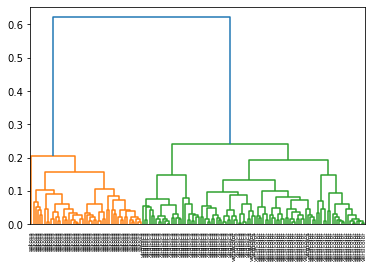

<Figure size 720x576 with 0 Axes>

In [79]:
dn = dendrogram(mergings, labels = list(df_iris['class']), leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize = (10, 8))
plt.show()


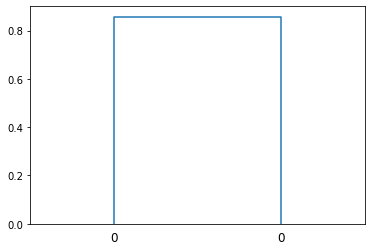

In [85]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [33]:
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_csv('../datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('../datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [34]:
# 3 represents number of cluster we want
model = KMeans(n_clusters = 3)

In [35]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [36]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [38]:
labels = model.predict(points)
labels

array([2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1,
       0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1])

In [39]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [67]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2

def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for label, point in zip(labels, points):
        if label == 0:
            data_0.append(point)
        elif label == 1:
            data_1.append(point)
        elif label == 2:
            data_2.append(point)
        
    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(95, 2)
(111, 2)


In [68]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

In [83]:
# First column is x, so it  is 0
# Second column is y, so it is 1
data_0[:3]

array([[1.70993371, 0.69885253],
       [1.16779145, 1.01262638],
       [1.21990375, 0.74643463]])

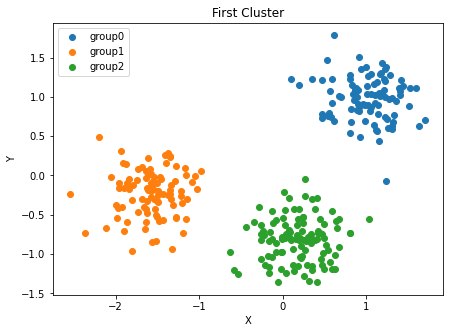

In [86]:
# plotting the data 
data = [data_0, data_1, data_2]
label_name = 0
label_name1 = 1
label_name2 = 2

plt.figure(figsize =(7, 5))
plt.scatter(data_0[:, 0], data_0[:, 1], label = f'group{label_name}')
plt.scatter(data_1[:, 0], data_1[:, 1], label = f'group{label_name1}')
plt.scatter(data_2[:, 0], data_2[:, 1], label = f'group{label_name2}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('First Cluster')
plt.legend()
plt.show()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [41]:
new_labels = model.predict(new_points)
new_labels[:3]

array([0, 0, 1])

In [42]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [73]:
#separate the data by labels like we did before

def separate_labels(new_labels, new_points):
    new_0 = []
    new_1 = []
    new_2 = []

    for labels, points in zip(new_labels, new_points):
        if labels == 0:
            new_0.append(points)
        elif labels == 1:
            new_1.append(points)
        elif labels == 2:
            new_2.append(points)
        
    return np.array(new_0), np.array(new_1), np.array(new_2)


new_0, new_1, new_2 = separate_labels(new_labels, new_points)

print(new_0.shape)
print(new_1.shape)
print(new_2.shape)

(34, 2)
(34, 2)
(32, 2)


In [74]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

In [87]:
new_0[:3]

array([[0.89676469, 1.14312679],
       [0.97385117, 0.92917238],
       [1.27755934, 1.37949406]])

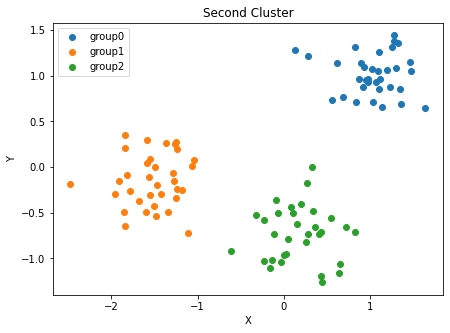

In [88]:
# plot the new labels
 
new = [new_0, new_1, new_2]
label_name = 0
label_name1 = 1
label_name2 = 2

plt.figure(figsize =(7, 5))
plt.scatter(new_0[:, 0], new_0[:, 1], label = f'group{label_name}')
plt.scatter(new_1[:, 0], new_1[:, 1], label = f'group{label_name1}')
plt.scatter(new_2[:, 0], new_2[:, 1], label = f'group{label_name2}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Second Cluster')
plt.legend()
plt.show()

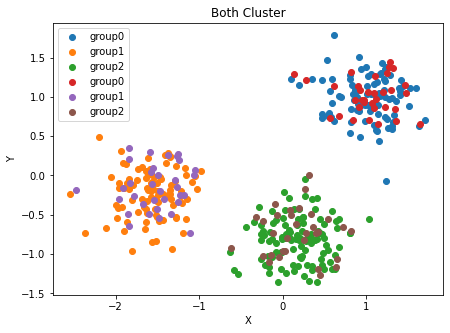

In [89]:
# plot all the points together

label_name = 0
label_name1 = 1
label_name2 = 2
new_label_name3 = 0
new_label_name4 = 1
new_label_name5 = 2

plt.figure(figsize =(7, 5))
plt.scatter(data_0[:, 0], data_0[:, 1], label = f'group{label_name}')
plt.scatter(data_1[:, 0], data_1[:, 1], label = f'group{label_name1}')
plt.scatter(data_2[:, 0], data_2[:, 1], label = f'group{label_name2}')

plt.scatter(new_0[:, 0], new_0[:, 1], label = f'group{new_label_name3}')
plt.scatter(new_1[:, 0], new_1[:, 1], label = f'group{new_label_name4}')
plt.scatter(new_2[:, 0], new_2[:, 1], label = f'group{new_label_name5}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Both Cluster')
plt.legend()
plt.show()